## Assignment: PCA Implementation

### Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

#### Instructions:

Download the wine dataset from the UCI Machine Learning Repository

Load the dataset into a Pandas dataframe.

Split the dataset into features and target variables.

Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

Implement PCA on the preprocessed dataset using the scikit-learn library.

Determine the optimal number of principal components to retain based on the explained variance ratio.

Visualise the results of PCA using a scatter plot.

Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

Interpret the results of PCA and clustering analysis.


#### Deliverables:
    
Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis.

Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.



#### Additional Information:
    
You can use the python programming language.

You can use any other machine learning libraries or tools as necessary.

You can use any visualisation libraries or tools as necessary.

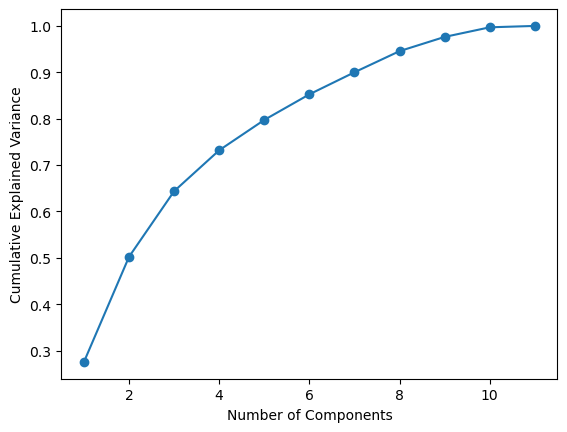

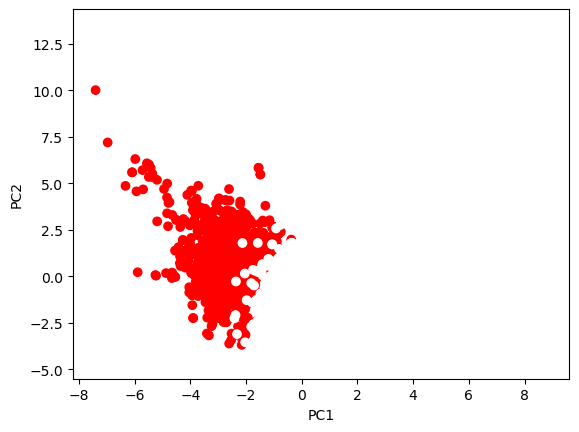

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette score is : 0.493153117958204


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the dataset into a Pandas dataframe
wine_data = pd.read_csv("wine_dataset.csv")

# Split the dataset into features and target variables
X = wine_data.drop(['quality', 'style'], axis=1) # features
y = wine_data['style'] # target variable

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA on the preprocessed dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components to retain based on the explained variance ratio
plt.plot(range(1, X.shape[1]+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Based on the above plot, select the optimal number of principal components to retain
n_components = 2

# Visualize the results of PCA using a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Perform clustering on the PCA-transformed data using K-Means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca[:, :n_components]) # using the first two principal components

# Performance metrics for the clustering algorithm
silhouette_avg = silhouette_score(X_pca[:, :n_components], kmeans.labels_)
print("The average silhouette score is :", silhouette_avg)
